#### Copyright 2019 Google LLC.

In [1]:
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Image Classification with Keras

Another common Machine Learning task is [classification](https://en.wikipedia.org/wiki/Statistical_classification) where one tries to categorize items into buckets.  In this lab, we will explore specifically classification as an instance of [supervised learning](https://en.wikipedia.org/wiki/Supervised_learning).  Out of scope for this lab is unsupervised learning methods, like clustering, etc.

Recently you learned about Linear Regression model, and used [Scikit Learn](https://scikit-learn.org/stable/) and [TensorFlow](https://www.tensorflow.org) as framework to build and train machine learning models.  We will now introduce you to [tf.keras](https://www.tensorflow.org/guide/keras) which is a high-level API to build and train models in TensorFlow.

<img height="20px" src="https://upload.wikimedia.org/wikipedia/commons/2/2d/Tensorflow_logo.svg" align="left" hspace="10px">

This lab is developed based on a [tutorial](https://www.tensorflow.org/tutorials/keras/basic_classification) from [TensorFlow.org](http://www.tensorflow.org).

## Overview

### Learning Objectives

  * Review the tf.keras APIs
  * How to load a dataset containing images and associated labels
  * Use Python module(s) to manipulate images
  * Configure, train, validate, and test a neural network model for supervised learning

### Prerequisites

* TODO(jmcadams)

### Estimated Duration

60 minutes

## Problem Framing

Image Classification is a process of identifying to which of a set of categories a new image belongs.  The identification task can be accomplished using either supervised on unsupervised machine learning techniques.

Questions we should ask ourselves might include:

 * How many training images will be needed to produce reasonable good model?
 * Will image size or resolution impact model quality?
 * What metrics are we using to define success and what are the acceptable values?
 * Is there a non-ML way to solve this problem?
 * What are some of the limitations of this model?
 * What variability in an image that might lead to incorrect prediction by the model?
 * Which approach - supervised or unsupervised learning method should be used?
 
The list of questions is boundless. Eventually you'll need to move on, but understanding the problem and the solution space is vital.

---

For this problem we'll further define the problem by saying:


> Since the images come with associated labels, thus we will focus on a supervised learning exercise.  We have less than 100,000 low resolution images that will be used as training data.  We would like to use the trained model to predict label for new set of images.  Given the short amount of training time, we'll accept an average accuracy on the prediction.

## Data

The dataset we'll use for this Colab is the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains 70,000 grayscale images in 10 categories.  Fashion MNIST is an alternative to the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset—often used as the "Hello, World" of machine learning programs for computer vision. The MNIST dataset contains images of handwritten digits (0, 1, 2, etc) in an identical format to the articles of clothing we'll use here.

The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

As this is a supervised machine learning exercise, besides the images we will also have labels associated with each images.

### Load the data

Now that we have a rough understanding of the data that we are going to use in our model, let's load it into this Colab.  The Fashion MNIST dataset is conveniently available from [Keras Datasets repository](https://keras.io/datasets/) along with a utility function for downloading and loading the data into Numpy arrays.

__Note:__ Working with other dataset may require you to build your own or use the available tools to download the data and load it to the appropriate data structure.

In [2]:
import tensorflow as tf

# Download datasets and upload them to Numpy arrays using the readily available
# load_data() utility function

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


Reading the output of load_data(), the Fashion MNIST dataset consists of 4 data files which belong to 2 datasets:

  * __Training dataset__ which consists of 60,000 images and labels to be used for model evaluation
  * __Test dataset__ which consists of 10,000 images and labels to be used for model evaluation
  
Do you recall the reason for splitting a dataset into separate training and test datasets?  Having a separate training dataset allows us to independently evaluate the quality of the model.

---

Great!  At this point, you have 2 NumPy arrays for each of the training and test datasets, and they named as following:

  * `train_images` and `train_labels`
  * `test_images` and `test_labels`
  
Let's take a closer look at the data.

### Examine the data

You should always look at your data and statistics about that data before you begin modelling it.  Since the data is stored in NumPy arrays, let's start by examining the shape of the arrays.

In [3]:
# Get the dimension of the data in the NumPy arrays

print('Training images:', train_images.shape)
print('Training labels:', train_labels.shape)
print('Test images:', test_images.shape)
print('Test labels:', test_labels.shape)

Training images: (60000, 28, 28)
Training labels: (60000,)
Test images: (10000, 28, 28)
Test labels: (10000,)


As expected, the training set has 60,000 data points and the test set has 10,000 data points.  And as you can see from the output above, the images arrays are 3d arrays, while the labels arrays are 1d arrays.

We know that each image contains 28 by 28 pixels which is represented in 28x28 Numpy array, with pixel values ranging between 0 and 255.  Let's examine a sample of the image data.

In [4]:
# Show data for the first image in the training dataset

train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

Those pixel values represent an image.  Let's plot the image to see what the image looks like.  We will use matplotlib which you have used in previous Colabs.  What you'll see is 28x28 pixel image and a legend bar on the right of the image with how each pixel will look like for each of the 0 to 255 values.

In [5]:
# Plot the first image from training dataset

import matplotlib.pyplot as plt
plt.figure()

# Plot the image
plt.imshow(train_images[0])

# Plot the colorbar legend
plt.colorbar()

# Do not plot grid lines
plt.grid(False)

Now, let's examine the image labels.  The labels are an array of integers, ranging from 0 to 9.  Each integer value corresponds to the __class of clothing__ the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th> 
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td> 
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td> 
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td> 
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td> 
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td> 
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td> 
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td> 
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td> 
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td> 
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td> 
  </tr>
</table>

Each image is mapped to a single label.

---

Let's take a quick look on what a training label may look like.

In [6]:
# Show the first 25 training labels

train_labels[:25]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4, 3, 1,
       4, 8, 4], dtype=uint8)

Did you learn any insight from peeking at the actual data?  Can you tell what the first image of the training data represent?

Well, the image is a low resolution one and hard to see it clearly.  If you guess it's some type of a boot then you're correct as the first label of the training data is `9` which mapped an `Ankle boot`.

### Preparing the data

A considerable amount of time is spent working with the dataset when creating a machine learning solution. In this case, we have looked at the data and it actually seems to be relatively clean.

Before using it, we'll do a couple of minor steps:

 1.   Scale the pixel values from 0 to 255 to a range from 0 to 1
 2.   Since the class names are not included with the dataset, we'll create a mapping array to use later when plotting the images.
 
__Note:__ It's important that the __training set__ and the __testing set__ are preprocessed in the same way.

In [7]:
# Scale the image pixel values from a range of 0 to 255 to a range of 0 to 1

train_images = train_images / 255.0
test_images = test_images / 255.0


In [8]:
# Create an array to hold the clothing class names

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


That's the extent of the data preparation needed as the dataset is fairly clean and the dataset provider has taken great care to ensure that all the images have a uniform size, and has an associated label.  If you gather your own images as dataset, you'll need to ensure the consistency of the images.

Let's plot the first 25 images from the training set and display the class name below each image. Verify that the data is in the correct format and we're ready to build and train the model.

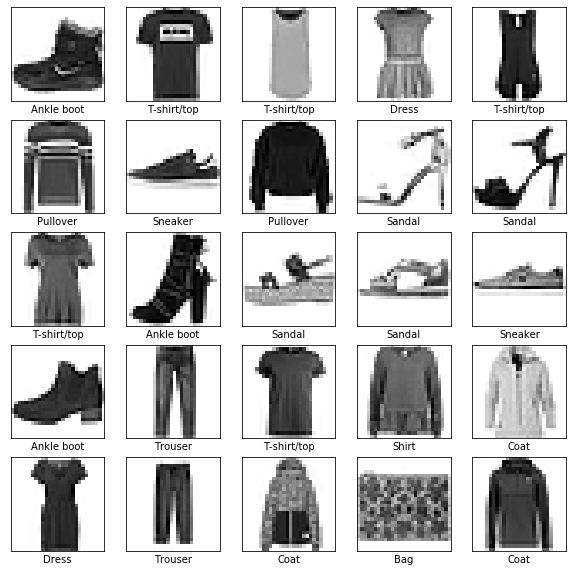

In [9]:
# Plot the first 25 images and associated labels from the training dataset

plt.figure(figsize=(10,10))

for i in range(25):
  
    # Set up 5x5 grid and plot sequentially from index 1 to 25
    plt.subplot(5,5,i+1)
    
    # Do not plot x and y axis and their associated tick marks
    plt.xticks([])
    plt.yticks([])
    
    # Do not plot grid lines
    plt.grid(False)
    
    # Plot the image
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    
    # Plot the label of the image on x axis
    plt.xlabel(class_names[train_labels[i]])
    

## Build the Model

Building the neural network model requires configuring the layers of the model, followed by compiling the model.

### Configure the Model

The basic building block of a neural network is the *layer*. Layers extract representations from the data fed into them. And, hopefully, these representations are more meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, like `tf.keras.layers.Dense`, have parameters that are learned during training.

In [10]:
# Define the model by specifying a neural network layers

model = tf.keras.Sequential([
    
    # Layer 1
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    
    # Layer 2
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    
    # Layer 3
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])


W0809 19:21:38.784346 4567020992 deprecation.py:506] From /Users/dorishuang/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Let's deconstruct the model to understand the neural network.  The model is made up from a sequence of 3 layers:

 * The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a 2d-array (of 28 by 28 pixels), to a 1d-array of 28 * 28 = 784 pixels. Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.
 
 * After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers. These are densely-connected, or fully-connected, neural layers.
 
  * The first `Dense` layer has 128 nodes (or neurons).
  * The second (and last) layer is a 10-node *softmax* layer—this returns an array of 10 probability scores that sum to 1. Each node in this last layer contains a score that indicates the probability that the current image belongs to one of the 10 classes.

### Compile the Model

Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:

* *Loss function* —This measures how well the model is  doing during training. We want to minimize this function to "steer" the model in the right direction. A large loss would indicate the model is performing poorly in classification tasks, meaning it is not matching input images to the correct class names (it might classify a boot as a coat for example).
* *Optimizer* —This is how the model is updated based on the data it sees and its loss function.
* *Metrics* —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [11]:
# Set model's settings, including loss function, optimizer, and metrics

model.compile(
    
    # Specify loss function
    loss='sparse_categorical_crossentropy',
    
    # Specify optimizer
    optimizer=tf.train.AdamOptimizer(),
    
    # Specify metrics
    metrics=['accuracy']
)


## Train the Model

Training the neural network model requires the following steps:

1. Feed the training data to the model—in this example, the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. We ask the model to make predictions about a test set—in this example, the `test_images` array. We verify that the predictions match the labels from the `test_labels` array. 

To start training,  call the `model.fit` method—the model is "fit" to the training data:

In [12]:
# Start model training

history = model.fit(train_images, train_labels, epochs=5)


Epoch 1/5
60000/60000 [==============================] - 3s 47us/sample - loss: 0.4996 - acc: 0.8246
Epoch 2/5
60000/60000 [==============================] - 3s 52us/sample - loss: 0.3784 - acc: 0.86320s - loss: 0.3790 - acc: 0.
Epoch 3/5
60000/60000 [==============================] - 3s 44us/sample - loss: 0.3370 - acc: 0.8773
Epoch 4/5
60000/60000 [==============================] - 2s 42us/sample - loss: 0.3150 - acc: 0.8841
Epoch 5/5
60000/60000 [==============================] - 3s 43us/sample - loss: 0.2962 - acc: 0.8908


As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.88 (or 88%) on the training data.

## Evaluate the Model

Model is trained, let's graph how the training accuracy and loss improved as the training progressed.  We can do that because the `model.fit()`` return a `History` object that contains the information.  Use the following code to create charts of the data from the `History` object.

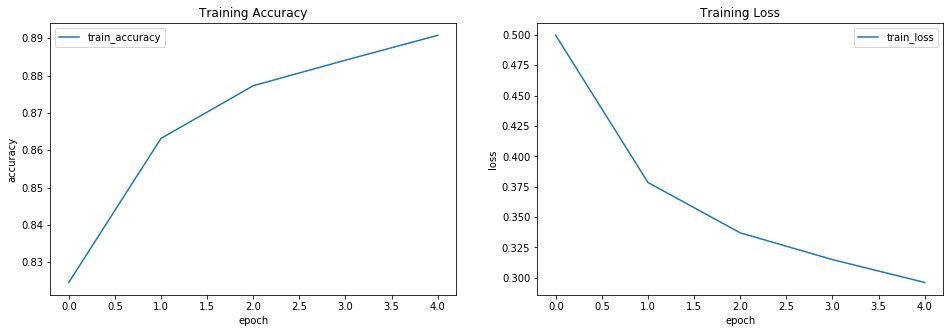

In [13]:
# Set the overall dimension of the chart area

plt.figure(figsize=(16,5))

# Set plot to go to first grid of a 1x2 grid

plt.subplot(1,2,1)

# Plot training set accuracy values for each training iteration

plt.plot(history.history['acc'])
plt.title('Training Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy'], loc='best')

# Set subplot to go to second grid of a 1x2 grid

plt.subplot(1,2,2)

# Plot training set loss values for each training iteration

plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss'], loc='best')

What questions come to mind as you examined the charts above?

  *  Are you surprised that the accuracy to be this high for the first iteration?
  *  What do you think might contribute to that?
  *  How will a smaller size training data, say 40,000 images impact the accuracy of the model?
  *  Will the model continue to improve with epochs > 5?
  
  ---
  
  Now let's evaluate the model using an independent test data set, and see if the model quality holds up.  We'll use `model.evaluate()` and pass in the test dataset.  `model.evaluare()` returns a `test_loss` and `test_acc`.


In [14]:
# Use test dataset to evaluate model accuracy

(test_loss, test_acc) = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)
print('Test loss:', test_loss)


10000/10000 [==============================] - 0s 41us/sample - loss: 0.3552 - acc: 0.8684
Test accuracy: 0.8684
Test loss: 0.3551790607213974


Well, it turns out, the accuracy on the test dataset is a little less than the accuracy on the training dataset.  This gap between training accuracy and test accuracy is an example of __overfitting__. Overfitting is when a machine learning model performs worse on new data than on their training data.  There a many reasons for overfitting which we'll discuss in more detail in the coming week, but one reason may be that the training dataset is not diverse enough to cover the range of possible images that we want to use the model to predict in the future.

## Make Predictions using the Trained Model

With the model trained, it's time to make predictions on images and see what label the image suggests.  For simplicity, let's use the test images as input to the model.  We'll use the `model.predict()` and:
  * Pass in `test_images` NumPy array as input
  * Get predicted labels for all input images back

In [15]:
# Use the trained model to predict labels of training images

predictions = model.predict(test_images)


 So, what does the predicted label data looks like?
 
  * For each image, the prediction result is in the form of 10 numbers - one for each possible label
  * In turn, each number represents the level of confidence that a label is the correct label for the particular image
  * All 10 numbers should add up to the sum of 1
  
  ---
  
  Let's examine the predictions array, and inspect the values for the first image in the test dataset.

In [16]:
# Show the dimension of predictions result

predictions.shape


(10000, 10)

After confirming that the predictions results contain one set of 10 numbers for each of the images in the test_image dataset, let's examine the prediction result for the first image.

In [17]:
# Print out the prediction scores for the first image

import numpy as np

np.set_printoptions(suppress=True)
predictions[0]


array([0.00000323, 0.00000109, 0.00000039, 0.00000002, 0.00000454,
       0.0076146 , 0.00001003, 0.08299483, 0.00000389, 0.90936744],
      dtype=float32)

In [18]:
# Check that the 10 numbers adds up to sum of 1

predictions[0].sum()

1.0

Let's find out which label has the highest predicted number and whether it matches with the actual test label.

In [19]:
# Show label with the highest confidence value
import numpy as np

print('Label with the highest confidence: {predicted_label}'.format(
    predicted_label = np.argmax(predictions[0])))


print('Actual label: {actual_label}'.format(actual_label = test_labels[0]))


print('Clothing class: {clothing_class}'.format(
    clothing_class = class_names[test_labels[0]]))


Label with the highest confidence: 9
Actual label: 9
Clothing class: Ankle boot


So the model is most confident that this image is an ankle boot, or `class_names[9]` and it matches the actual test label.

Let's take a look at the image, as well as the bar chart of the prediction values.  In order to do, please use the following utility functions `plot_image()` and `plot_value_array`.

In [20]:
# Utility function to plot image and actual label

def plot_image(i, predictions_array, true_label, img):
  
  predictions_array = predictions_array[i]
  true_label = true_label[i]
  img = img[i]

  # Remove grid, x and y axis ticks from the chart
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  # Plot the image
  plt.imshow(img, cmap=plt.cm.binary)

  # Set predicted_label to the highest value from the prediction result
  predicted_label = np.argmax(predictions_array)

  # Set color to blue on a correct prediction, otherwise set color to red
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  # Print the predicted label, confidence number, and actual label
  plt.xlabel("{} ({:2.0f}%) vs {}".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

  
# Utility function to plot the prediction numbers

def plot_value_array(i, predictions_array, true_label):

  predictions_array = predictions_array[i]
  true_label = true_label[i]
  
  # Don't print chart grid and both axis, and prepare a bar chart
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  
  # Set predicted_label to the highest value from the prediction result
  predicted_label = np.argmax(predictions_array)
 
  # Set color to blue on a correct prediction, otherwise set color to red
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Prediction result for image number: 0



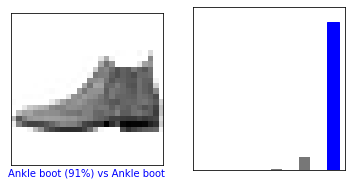

In [21]:
image_number = 0
print('Prediction result for image number: ' + str(image_number) + '\n')

# Use the utility functions to show the image and the bar chart
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(image_number, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(image_number, predictions,  test_labels)

So, looking at the bar chart shows that by far the model think it's an ankle boot, and the only other much less significant number is for sneaker (the gray bar).

---

Now that you are familiar with how to examine and visualize the prediction result for a particular image, let's looks at 32 images.  You'll notice a variety of results including:

  * High confidence and correct label
  * High confidence and incorrect label
  * Less confidence number on multiple labels
  
Anything stood out in cases where incorrect label is predicted, or where the model did not assign a high confidence number on any one label?  What do you think can be changed to improve model performance in these cases?


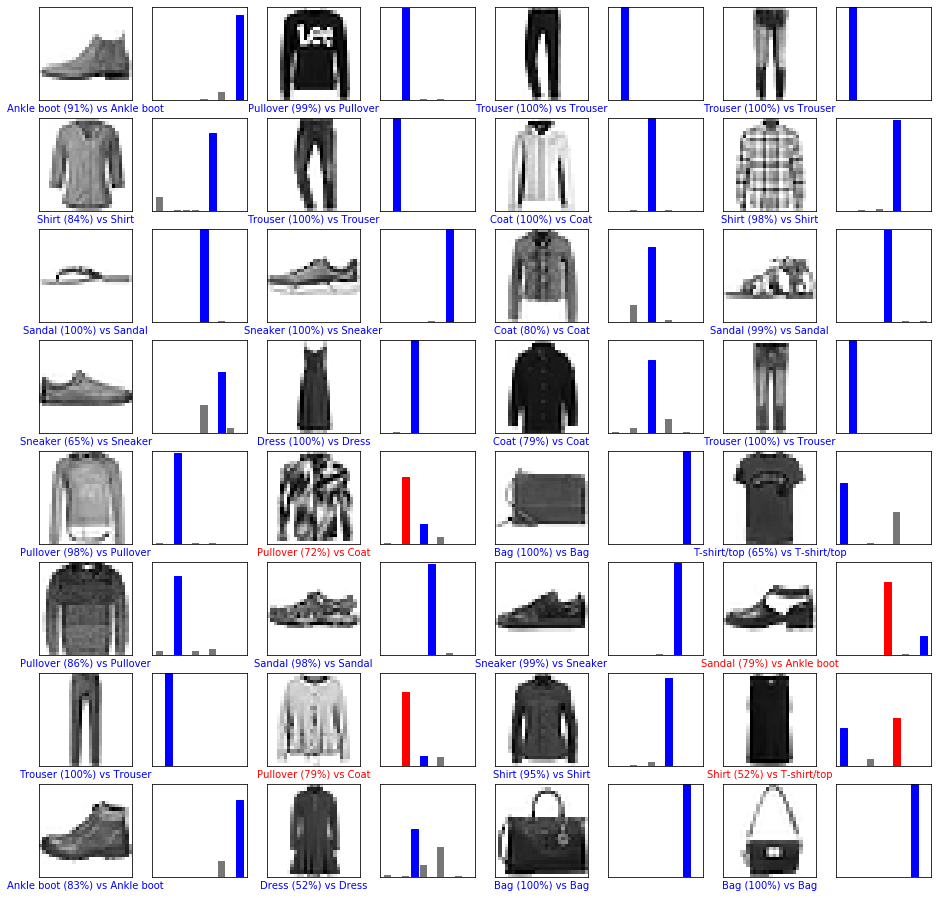

In [22]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red

num_rows = 8
num_cols = 4
num_images = num_rows*num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

# Exercises

## Exercise 1: Size of training set vs Model quality

This model above was trained with 60,000 images and `epochs=5`, and achieved training accuracy of 88% in a relative short amount of training time.

Your exercise is to experiment with smaller training datasets and answer the following questions:

  * How the accuracy of the trained model impacted by smaller training datasets?
  * How do the training accuracy and loss charts look like for the different size training datasets?
  * Can you still achieve 88% accuracy on training dataset given a smaller dataset?  If so, how do you achieve that?
  
Write a short report on the answers to the questions above, including the supporting data, and your code below.  Optional: include any notes or other insights you come into during the experiment.

### Student Solution

__Your Analysis:__

Add your exploration notes, thought process, things you learned, conclusion (if any) and supporting data here.

*   Different methods of decreasing the size of the training dataset will create different result. By slicing through the train_images and train_labels, given training set half the orignial size, the accurancy of the model improved to 91.25%. Continuing reducing the rize of the training dataset, the accurancy increases. This might happen due to manualling slicing will create imbalanced number of training samples for each class. 
*   However, using the train_test_split to split the dataset, the accurancy performs worse than before. With 30000 train inputs, the accurancy is around 82%. With 56000 train inputs, the accurancy is around 85%. 
*   The training accuracy and loss charts have more rigid turning than before. 
*  Using the train test split method regardless of the train test ratio, the accurancy can't reach 88%. However, with smaller dataset, the model still performs relatively good with 82%-86% accurancy. The larger the train dataset is, the more accurancy the model can get. 




Epoch 1/5
30000/30000 [==============================] - 2s 58us/sample - loss: 0.2792 - acc: 0.8977
Epoch 2/5
30000/30000 [==============================] - 2s 53us/sample - loss: 0.2621 - acc: 0.9047
Epoch 3/5
30000/30000 [==============================] - 2s 52us/sample - loss: 0.2529 - acc: 0.9070
Epoch 4/5
30000/30000 [==============================] - 2s 61us/sample - loss: 0.2418 - acc: 0.9116
Epoch 5/5
30000/30000 [==============================] - 1s 48us/sample - loss: 0.2320 - acc: 0.91571s - los


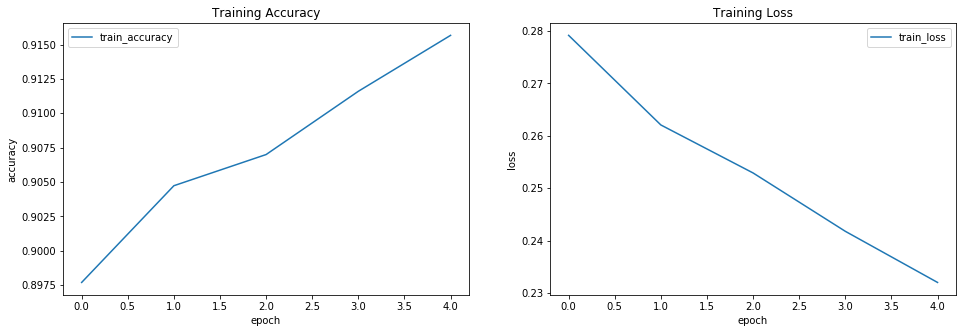

In [23]:
small_train_images = train_images[20000:50000]
small_train_labels = train_labels[20000:50000]
history = model.fit(small_train_images, small_train_labels, epochs=5)

# Set the overall dimension of the chart area
plt.figure(figsize=(16,5))

# Set plot to go to first grid of a 1x2 grid
plt.subplot(1,2,1)

# Plot training set accuracy values for each training iteration
plt.plot(history.history['acc'])
plt.title('Training Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy'], loc='best')

# Set subplot to go to second grid of a 1x2 grid
plt.subplot(1,2,2)

# Plot training set loss values for each training iteration
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss'], loc='best')

Epoch 1/5
30000/30000 [==============================] - 1s 48us/sample - loss: 7.7342 - acc: 0.6870
Epoch 2/5
30000/30000 [==============================] - 1s 47us/sample - loss: 1.2888 - acc: 0.6514
Epoch 3/5
30000/30000 [==============================] - 1s 44us/sample - loss: 1.0113 - acc: 0.6699
Epoch 4/5
30000/30000 [==============================] - 1s 49us/sample - loss: 1.0538 - acc: 0.6674
Epoch 5/5
30000/30000 [==============================] - 1s 43us/sample - loss: 0.9345 - acc: 0.6543


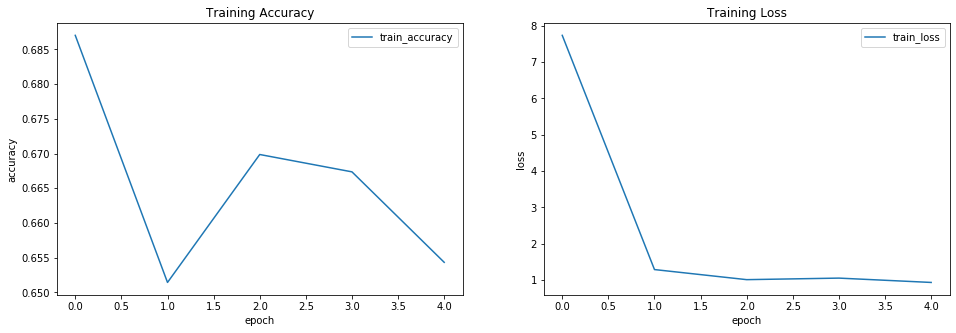

In [24]:
import numpy as np
from sklearn.model_selection import train_test_split

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
# images = np.concatenate((train_images,test_images),axis = 0)
# labels = np.concatenate((train_labels,test_labels),axis = 0)

# X_train, X_test, y_train, y_test = train_test_split(
#      images, labels, test_size=0.5)

X_train, X_test, y_train, y_test = train_test_split(
     train_images, train_labels, test_size=0.5, stratify = train_labels)

history = model.fit(X_train, y_train, epochs=5)

# Set the overall dimension of the chart area
plt.figure(figsize=(16,5))

# Set plot to go to first grid of a 1x2 grid
plt.subplot(1,2,1)

# Plot training set accuracy values for each training iteration
plt.plot(history.history['acc'])
plt.title('Training Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy'], loc='best')

# Set subplot to go to second grid of a 1x2 grid
plt.subplot(1,2,2)

# Plot training set loss values for each training iteration
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss'], loc='best')

Epoch 1/5
56000/56000 [==============================] - 3s 51us/sample - loss: 1.1148 - acc: 0.65361s - loss: - ETA: 0s - loss: 1.1075 - acc: 0.6
Epoch 2/5
56000/56000 [==============================] - 3s 48us/sample - loss: 0.9158 - acc: 0.6787
Epoch 3/5
56000/56000 [==============================] - 3s 46us/sample - loss: 0.8783 - acc: 0.6936
Epoch 4/5
56000/56000 [==============================] - 3s 46us/sample - loss: 0.7781 - acc: 0.7163
Epoch 5/5
56000/56000 [==============================] - 3s 46us/sample - loss: 0.7646 - acc: 0.7227


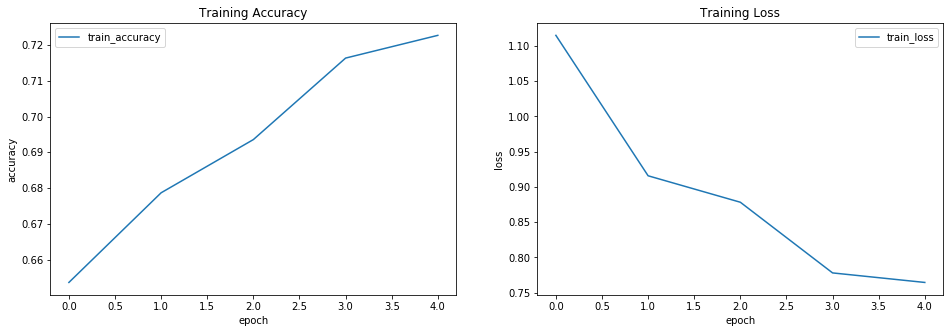

In [25]:
import numpy as np
from sklearn.model_selection import train_test_split

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
images = np.concatenate((train_images,test_images),axis = 0)
labels = np.concatenate((train_labels,test_labels),axis = 0)

X_train, X_test, y_train, y_test = train_test_split(
     images, labels, test_size=0.2,stratify = labels)

# X_train, X_test, y_train, y_test = train_test_split(
#      train_images, train_labels, test_size=0.001, stratify = train_labels)
history = model.fit(X_train, y_train, epochs=5)

# Set the overall dimension of the chart area
plt.figure(figsize=(16,5))

# Set plot to go to first grid of a 1x2 grid
plt.subplot(1,2,1)

# Plot training set accuracy values for each training iteration
plt.plot(history.history['acc'])
plt.title('Training Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy'], loc='best')

# Set subplot to go to second grid of a 1x2 grid
plt.subplot(1,2,2)

# Plot training set loss values for each training iteration
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss'], loc='best')